# ■shot map 그리기

# 241009 
1. 일단 시작
2. 엑셀데이터 불러오기


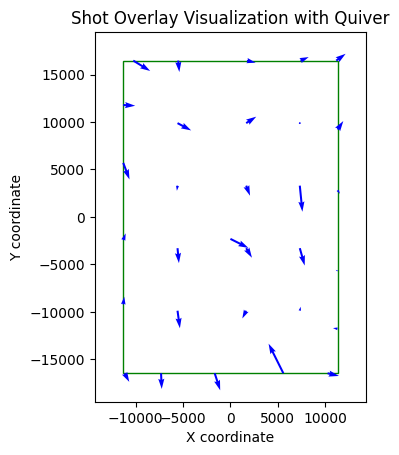

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

# 데이터 불러오기
file_path = 'sample.xlsx'  # 파일 경로
df = pd.read_excel(file_path)

# 데이터 값들
step_pitch_x = df['STEP_PITCH_X'].iloc[0]
step_pitch_y = df['STEP_PITCH_Y'].iloc[0]
coordinate_x = df['coordinate_X']
coordinate_y = df['coordinate_Y']
x_reg = df['X_reg']
y_reg = df['Y_reg']

# shot의 중심 좌표
shot_center_x = 0
shot_center_y = 0

# 단일 shot 사각형의 모서리 좌표 계산 (단일 크기 사용)
shot_left = shot_center_x - step_pitch_x / 2
shot_right = shot_center_x + step_pitch_x / 2
shot_bottom = shot_center_y - step_pitch_y / 2
shot_top = shot_center_y + step_pitch_y / 2

# 그림 그리기
fig, ax = plt.subplots()

# shot 사각형 그리기
rect = patches.Rectangle((shot_left, shot_bottom), step_pitch_x, step_pitch_y,
                         linewidth=1, edgecolor='green', facecolor='none')
ax.add_patch(rect)

# overlay 측정 포인트에서 벡터 화살표로 표시 (quiver 사용)
ax.quiver(coordinate_x, coordinate_y, x_reg, y_reg, 
          angles='xy', scale_units='xy', scale=1e-6, color='blue')

# 그래프 설정
ax.set_xlim(shot_left - 3000, shot_right + 3000)
ax.set_ylim(shot_bottom - 3000, shot_top + 3000)
ax.set_aspect('equal')  # 축 비율을 균등하게 설정
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')
ax.set_title('Shot Overlay Visualization with Quiver')

plt.show()

